<a href="https://colab.research.google.com/github/sanjana-singamsetty/Finance-expense-tracker/blob/main/Finance_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/daily-transactions-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/prasad22/daily-transactions-dataset/versions/4


In [34]:
import pandas as pd
import os

# Path to the dataset directory
dataset_path = "/root/.cache/kagglehub/datasets/prasad22/daily-transactions-dataset/versions/4"

# List files in the dataset directory to identify the file name
files = os.listdir(dataset_path)
print("Files in dataset directory:", files)

# Assuming the file is a CSV
file_name = "Daily Household Transactions.csv"  # Replace this with the actual file name if different
data = pd.read_csv(os.path.join(dataset_path, file_name))

# Preview the dataset
data.head()


Files in dataset directory: ['Daily Household Transactions.csv']


,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [35]:
data.isna().sum()



,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


In [37]:
data.shape

(2461, 8)

In [39]:
df=data

In [40]:
missing_columns = df.columns[df.isnull().any()]
# Function to perform random imputation
def random_imputation(column):
    missing = column.isnull()  # Boolean mask for missing values
    non_missing_values = column[~missing]  # Values that are not missing
    random_values = np.random.choice(non_missing_values, size=missing.sum())  # Random values
    column[missing] = random_values  # Fill missing values
    return column

# Apply random imputation to all columns with missing values
for col in missing_columns:
    df[col] = random_imputation(df[col])

# Check if missing values are handled
print("Remaining missing values:\n", df.isnull().sum())


Remaining missing values:
 Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
dtype: int64


<ipython-input-40-3e9b431d279a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[missing] = random_values  # Fill missing values
<ipython-input-40-3e9b431d279a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[missing] = random_values  # Fill missing values


In [41]:
# Check unique values in 'Category'
print("Unique values in 'Category':")
print(df['Category'].unique())

# Check unique values in 'Subcategory'
print("\nUnique values in 'Subcategory':")
print(df['Subcategory'].unique())

# Check value counts in 'Category'
print("\nValue counts in 'Category':")
print(df['Category'].value_counts())

# Check value counts in 'Subcategory'



Unique values in 'Category':
['Transportation' 'Food' 'subscription' 'Festivals' 'Other'
 'Small Cap fund 2' 'Small cap fund 1' 'Family' 'Equity Mutual Fund E'
 'Apparel' 'Public Provident Fund' 'Saving Bank account 1' 'Gift' 'Salary'
 'Household' 'Dividend earned on Shares' 'Interest' 'Life Insurance'
 'Beauty' 'Health' 'Money transfer' 'maid' 'Culture' 'Tax refund'
 'Tourism' 'Share Market' 'Self-development' 'Amazon pay cashback'
 'Education' 'scrap' 'Petty cash' 'Documents' 'Gpay Reward' 'Social Life'
 'Equity Mutual Fund A' 'Maturity amount' 'Fixed Deposit'
 'Equity Mutual Fund C' 'Equity Mutual Fund F' 'Recurring Deposit'
 'Saving Bank account 2' 'Equity Mutual Fund D' 'Equity Mutual Fund B'
 'Bonus' 'Investment' 'Grooming' 'Rent' 'Cook' 'garbage disposal'
 'water (jar /tanker)']

Unique values in 'Subcategory':
['Train' 'snacks' 'Netflix' 'Mobile Service Provider' 'Ganesh Pujan'
 'Tata Sky' 'auto' 'breakfast' 'Grocery' 'Mutual fund' 'Lunch' 'Kirana'
 'Milk' 'Pocket money' 'Hospi

In [42]:
df.duplicated().sum()

0

In [44]:
df.shape

(2461, 8)

In [46]:
df['Date'] = df['Date'].str.split(' ').str[0]

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values(by='Date', ascending=True)

df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

df

<ipython-input-46-846e2e2fb87e>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
Date,,,,,,,
2015-01-01,Cash,Transportation,vegetables,share auto - hospital to brc station,10.0,Expense,INR
2015-01-01,Credit Card,Food,fruits,bendys chicken biryani,400.0,Expense,INR
2015-01-01,Cash,Transportation,Milk,share jeep - Place T top to base,20.0,Expense,INR
2015-01-01,Cash,Transportation,Pocket money,share jeep - Place T to brc,60.0,Expense,INR
2015-01-01,Cash,Culture,Potato,monument,40.0,Expense,INR
...,...,...,...,...,...,...,...
2018-09-16,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
2018-09-17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
2018-09-19,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR


In [51]:
df

,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
Date,,,,,,,
2015-01-01,Cash,Transportation,vegetables,share auto - hospital to brc station,10.0,Expense,INR
2015-01-01,Credit Card,Food,fruits,bendys chicken biryani,400.0,Expense,INR
2015-01-01,Cash,Transportation,Milk,share jeep - Place T top to base,20.0,Expense,INR
2015-01-01,Cash,Transportation,Pocket money,share jeep - Place T to brc,60.0,Expense,INR
2015-01-01,Cash,Culture,Potato,monument,40.0,Expense,INR
...,...,...,...,...,...,...,...
2018-09-16,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
2018-09-17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
2018-09-19,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR


In [52]:
# Inspect the first few rows of the DataFrame
print(df.head())


                   Mode        Category   Subcategory  \
Date                                                    
2015-01-01         Cash  Transportation    vegetables   
2015-01-01  Credit Card            Food        fruits   
2015-01-01         Cash  Transportation          Milk   
2015-01-01         Cash  Transportation  Pocket money   
2015-01-01         Cash         Culture        Potato   

                                            Note  Amount Income/Expense  \
Date                                                                      
2015-01-01  share auto - hospital to brc station    10.0        Expense   
2015-01-01                bendys chicken biryani   400.0        Expense   
2015-01-01      share jeep - Place T top to base    20.0        Expense   
2015-01-01           share jeep - Place T to brc    60.0        Expense   
2015-01-01                              monument    40.0        Expense   

           Currency  
Date                 
2015-01-01      INR  
2015-01-

In [58]:

# Strip spaces from the column names (if any)
df.columns = df.columns.str.strip()

# Verify the column names
print(df.columns)



Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')


In [59]:
# Convert 'Amount' to numeric (if needed)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Convert 'Date' to datetime (if not already done)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing 'Amount' or 'Date'
df = df.dropna(subset=['Amount', 'Date'])

# Verify the data types and structure
print(df.dtypes)
print(df.head())


Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
dtype: object
        Date         Mode        Category   Subcategory  \
0 2015-01-01         Cash  Transportation    vegetables   
1 2015-01-01  Credit Card            Food        fruits   
2 2015-01-01         Cash  Transportation          Milk   
3 2015-01-01         Cash  Transportation  Pocket money   
4 2015-01-01         Cash         Culture        Potato   

                                   Note  Amount Income/Expense Currency  
0  share auto - hospital to brc station    10.0        Expense      INR  
1                bendys chicken biryani   400.0        Expense      INR  
2      share jeep - Place T top to base    20.0        Expense      INR  
3           share jeep - Place T to brc    60.0        Expense      INR

In [61]:
# Final check of the first few rows
print(df.head())

# Check for any missing values
df.isnull().sum()


        Date         Mode        Category   Subcategory  \
0 2015-01-01         Cash  Transportation    vegetables   
1 2015-01-01  Credit Card            Food        fruits   
2 2015-01-01         Cash  Transportation          Milk   
3 2015-01-01         Cash  Transportation  Pocket money   
4 2015-01-01         Cash         Culture        Potato   

                                   Note  Amount Income/Expense Currency  
0  share auto - hospital to brc station    10.0        Expense      INR  
1                bendys chicken biryani   400.0        Expense      INR  
2      share jeep - Place T top to base    20.0        Expense      INR  
3           share jeep - Place T to brc    60.0        Expense      INR  
4                              monument    40.0        Expense      INR  


,0
Date,0
Mode,0
Category,0
Subcategory,0
Note,0
Amount,0
Income/Expense,0
Currency,0


In [64]:
import pandas as pd
import numpy as np
import random

# Function to add random noise to numeric columns like 'Amount'
def augment_numeric_column(df, column, noise_factor=0.05):
    noise = np.random.normal(loc=0, scale=noise_factor * df[column].std(), size=len(df))
    df[column] = df[column] + noise
    return df

# Function to augment categorical columns by randomizing values
def augment_categorical_column(df, column):
    unique_values = df[column].unique()
    df[column] = df[column].apply(lambda x: random.choice(unique_values))
    return df

# Function to add random time shifts to 'Date' column
def augment_date_column(df, column, max_shift_days=5):
    random_shifts = np.random.randint(-max_shift_days, max_shift_days, size=len(df))
    df[column] = pd.to_datetime(df[column]) + pd.to_timedelta(random_shifts, unit='D')
    return df

# Function to augment the 'Note' column (optional)
def augment_note_column(df, column, variation_factor=0.1):
    df[column] = df[column].apply(lambda x: x + ' - Variation' if random.random() < variation_factor else x)
    return df

# Function to increase the dataset size by applying augmentations
def increase_dataset(df, augmentation_factor=1.0):
    # Duplicate the dataset based on the augmentation factor
    new_samples = pd.concat([df] * (int(augmentation_factor) + 1), ignore_index=True)

    # Apply variations across all columns
    new_samples = augment_numeric_column(new_samples, 'Amount')  # For numeric columns
    new_samples = augment_categorical_column(new_samples, 'Mode')  # For 'Mode' column
    new_samples = augment_categorical_column(new_samples, 'Category')  # For 'Category' column
    new_samples = augment_categorical_column(new_samples, 'Subcategory')  # For 'Subcategory' column
    new_samples = augment_categorical_column(new_samples, 'Income/Expense')  # For 'Income/Expense' column
    new_samples = augment_categorical_column(new_samples, 'Currency')  # For 'Currency' column
    new_samples = augment_date_column(new_samples, 'Date')  # For 'Date' column
    new_samples = augment_note_column(new_samples, 'Note')  # For 'Note' column

    return new_samples



# Convert data into DataFrame
df = pd.DataFrame(df)

# Display original shape
print(f"Original dataset shape: {df.shape}")

# Increase dataset size by 2x (e.g., original dataset of 5 rows becomes 10 rows)
augmented_df = increase_dataset(df, augmentation_factor=1)

# Display new shape after augmentation
print(f"Augmented dataset shape: {augmented_df.shape}")

# Optionally, view the first few rows of the augmented dataset
augmented_df.head()


Original dataset shape: (2461, 8)
Augmented dataset shape: (4922, 8)


,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,2014-12-31,Share Market Trading,Festivals,Cable TV,share auto - hospital to brc station,435.920684,Transfer-Out,INR
1,2015-01-03,Credit Card,Recurring Deposit,vegetables,bendys chicken biryani,1096.622118,Income,INR
2,2015-01-01,Fixed Deposit,maid,flour mill,share jeep - Place T top to base,-360.298797,Expense,INR
3,2015-01-04,Credit Card,Bonus,ropeway,share jeep - Place T to brc,-391.456302,Expense,INR
4,2015-01-01,Debit Card,Share Market,Taxi,monument,394.506151,Income,INR


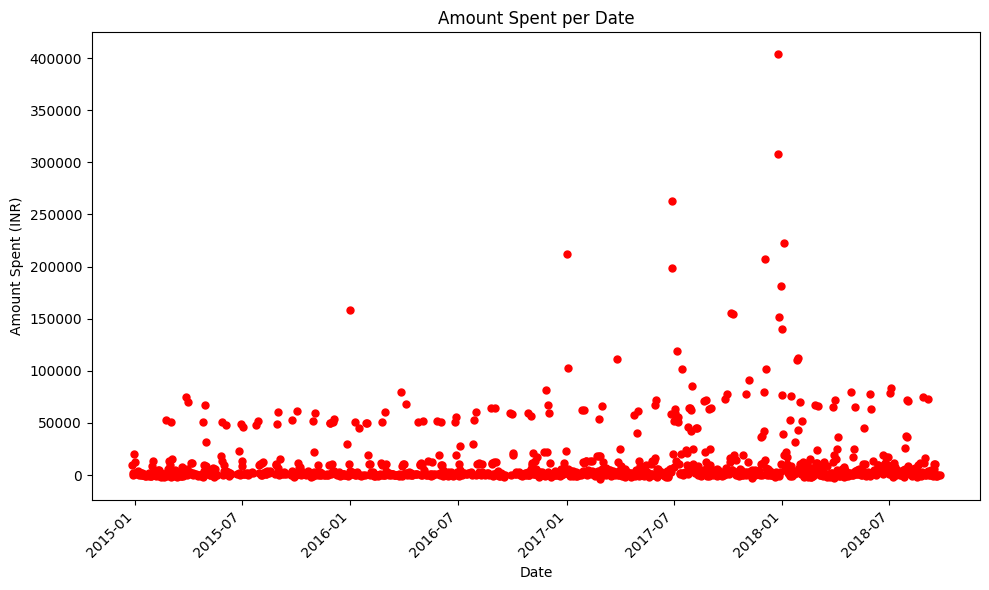

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `augmented_df` is the DataFrame after augmentation
# Group the data by 'Date' and sum the 'Amount' spent on each date
amount_per_date = augmented_df.groupby('Date')['Amount'].sum()

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(amount_per_date.index, amount_per_date.values, marker='o', color='r', linestyle='-', linewidth=0, markersize=5)

# Adding labels and title
plt.title('Amount Spent per Date')
plt.xlabel('Date')
plt.ylabel('Amount Spent (INR)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # To ensure labels are not cut off

# Display the plot
plt.show()


<ipython-input-81-7872ce35b7cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Mode', data=df, palette='rocket')
<ipython-input-81-7872ce35b7cd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df, palette='rocket')
<ipython-input-81-7872ce35b7cd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Subcategory', data=df, palette='rocket')


Text(0.5, 1.0, 'Distribution of Subcategory')

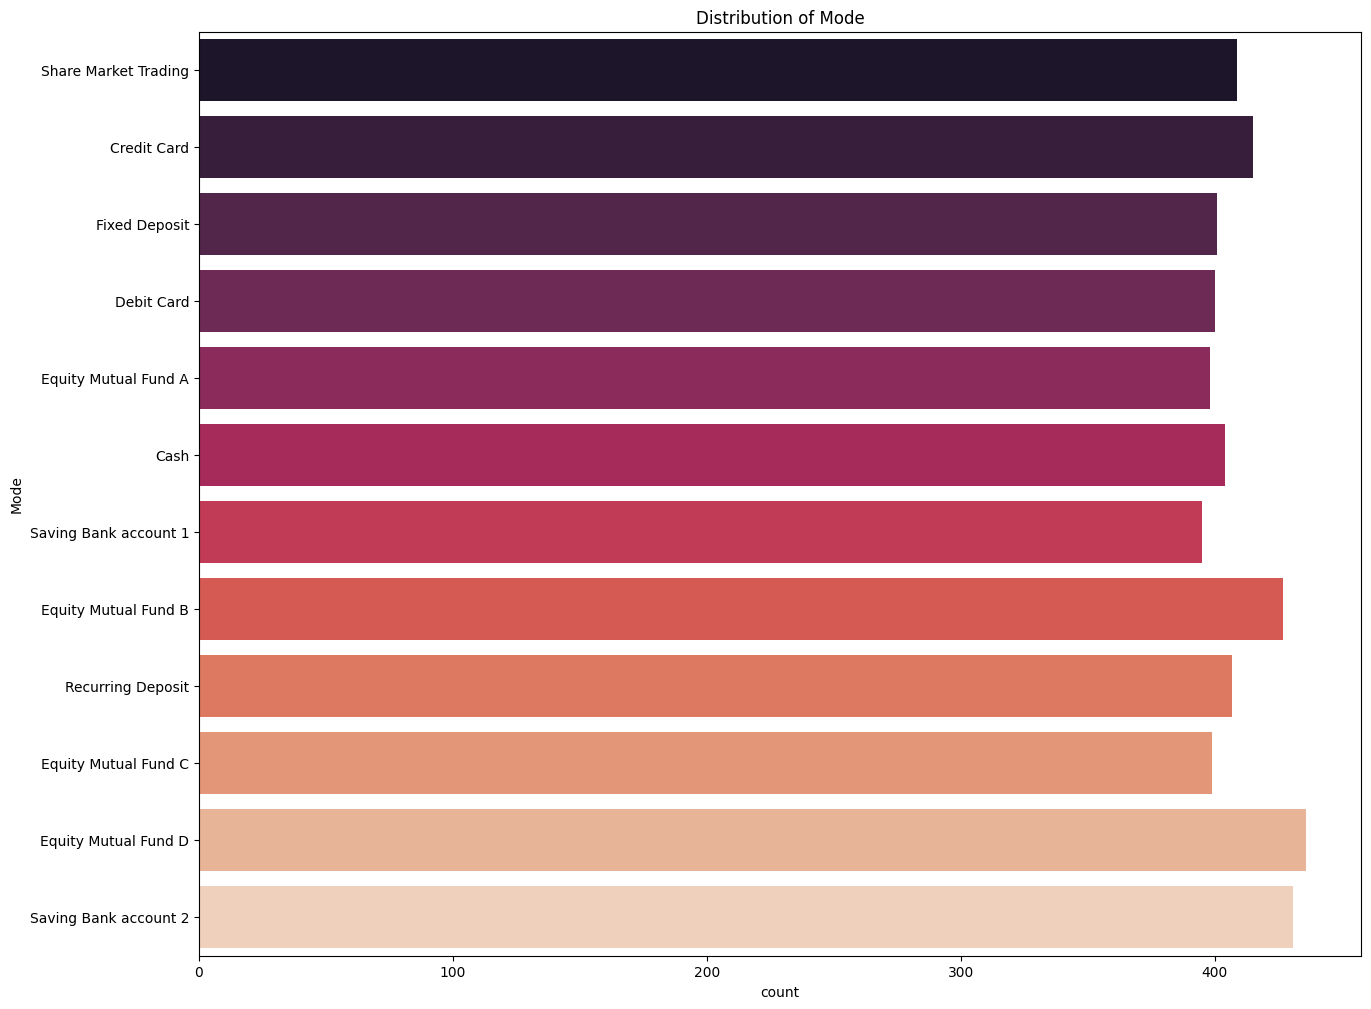

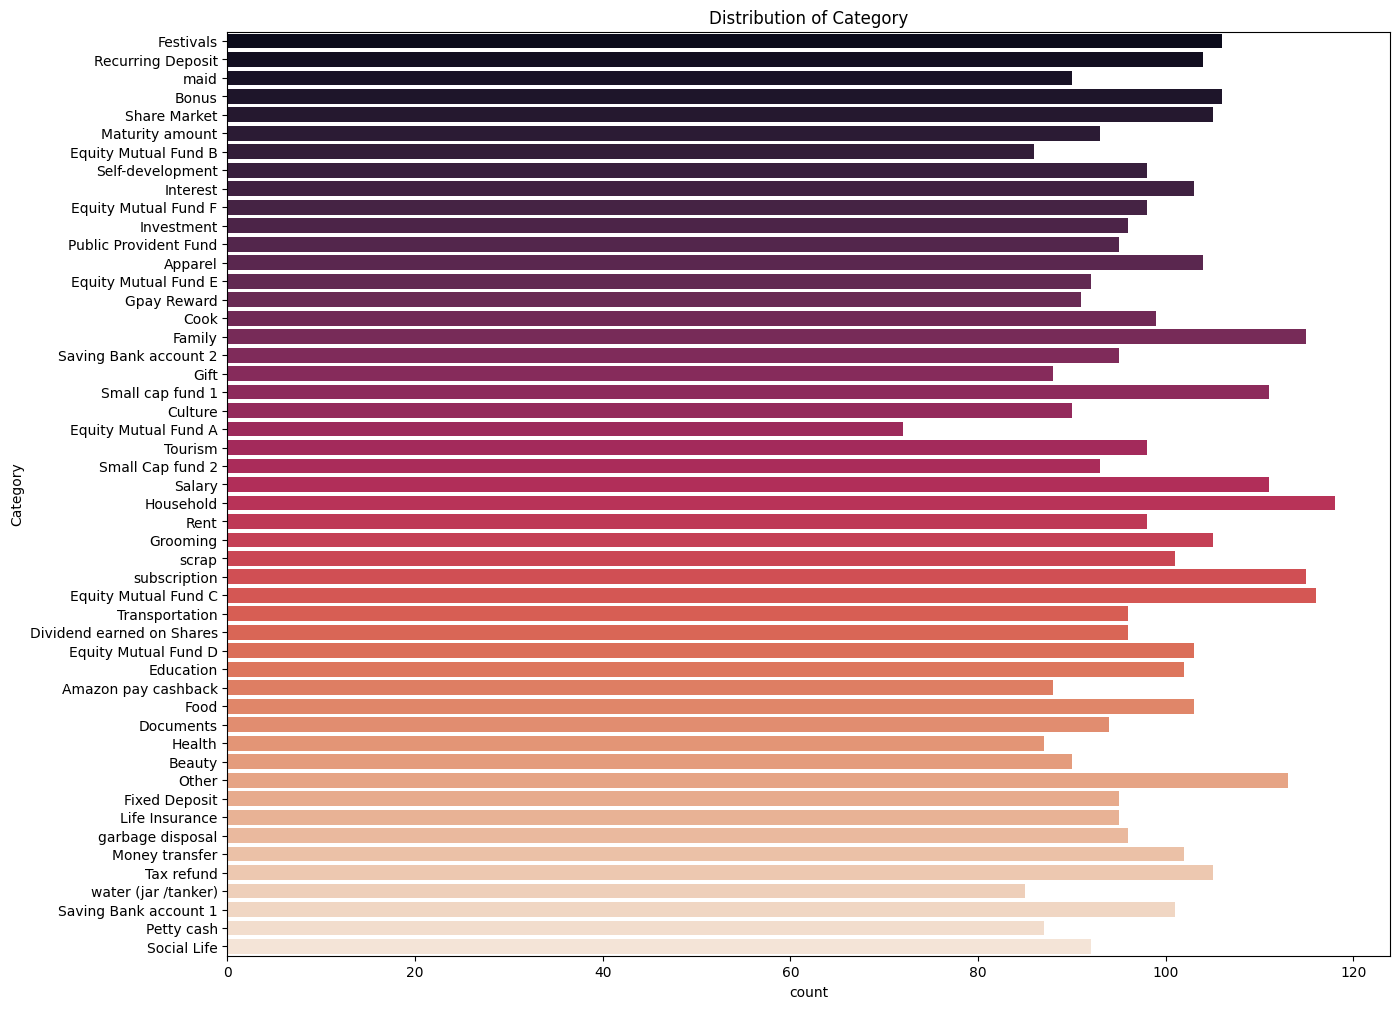

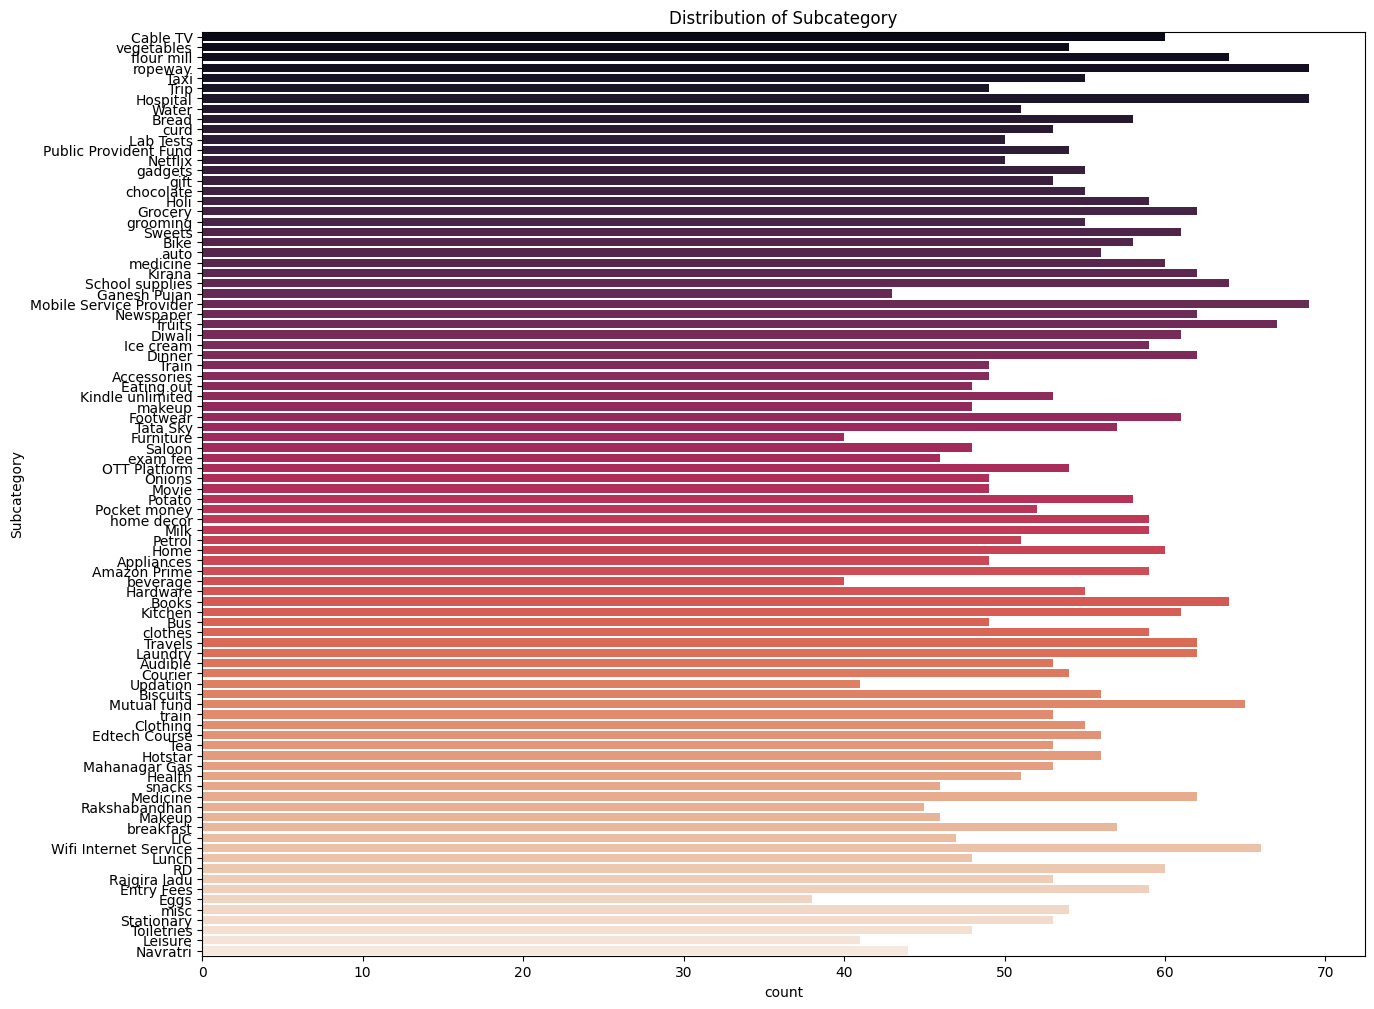

In [81]:
df=augmented_df
plt.figure(figsize=(15, 12))
sns.countplot(y='Mode', data=df, palette='rocket')
plt.title(f'Distribution of Mode')

plt.figure(figsize=(15, 12))
sns.countplot(y='Category', data=df, palette='rocket')
plt.title(f'Distribution of Category')

plt.figure(figsize=(15, 12))
sns.countplot(y='Subcategory', data=df, palette='rocket')
plt.title(f'Distribution of Subcategory')

<Figure size 1500x1000 with 0 Axes>

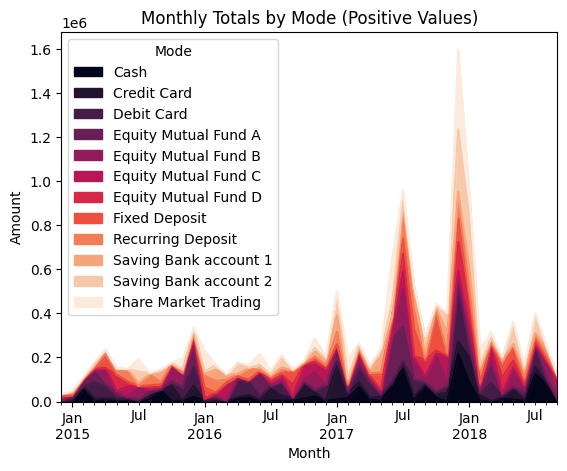

<Figure size 1500x1000 with 0 Axes>

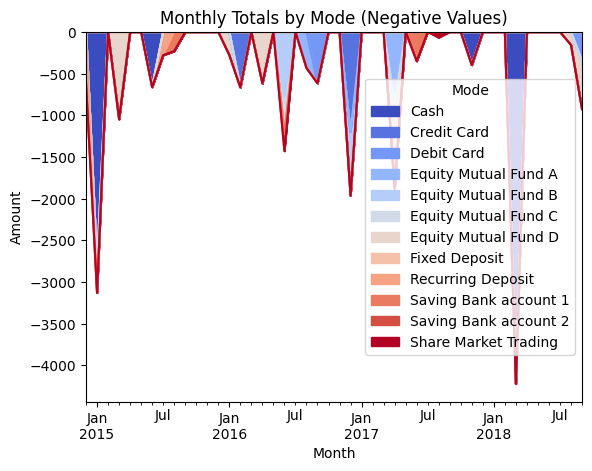

In [83]:
# Split the data into positive and negative values for plotting
monthly_mode_positive = monthly_mode[monthly_mode >= 0].fillna(0)
monthly_mode_negative = monthly_mode[monthly_mode < 0].fillna(0)

# Plot positive values in the area chart
plt.figure(figsize=(15, 10))
monthly_mode_positive.plot(kind='area', stacked=True, colormap='rocket')
plt.title('Monthly Totals by Mode (Positive Values)')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

# Plot negative values in a separate area chart
plt.figure(figsize=(15, 10))
monthly_mode_negative.plot(kind='area', stacked=True, colormap='coolwarm')
plt.title('Monthly Totals by Mode (Negative Values)')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()


<ipython-input-84-df4d3f4f1c05>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_15_notes.index, x=top_15_notes.values, palette='rocket')


Text(0.5, 0, 'Total Amount')

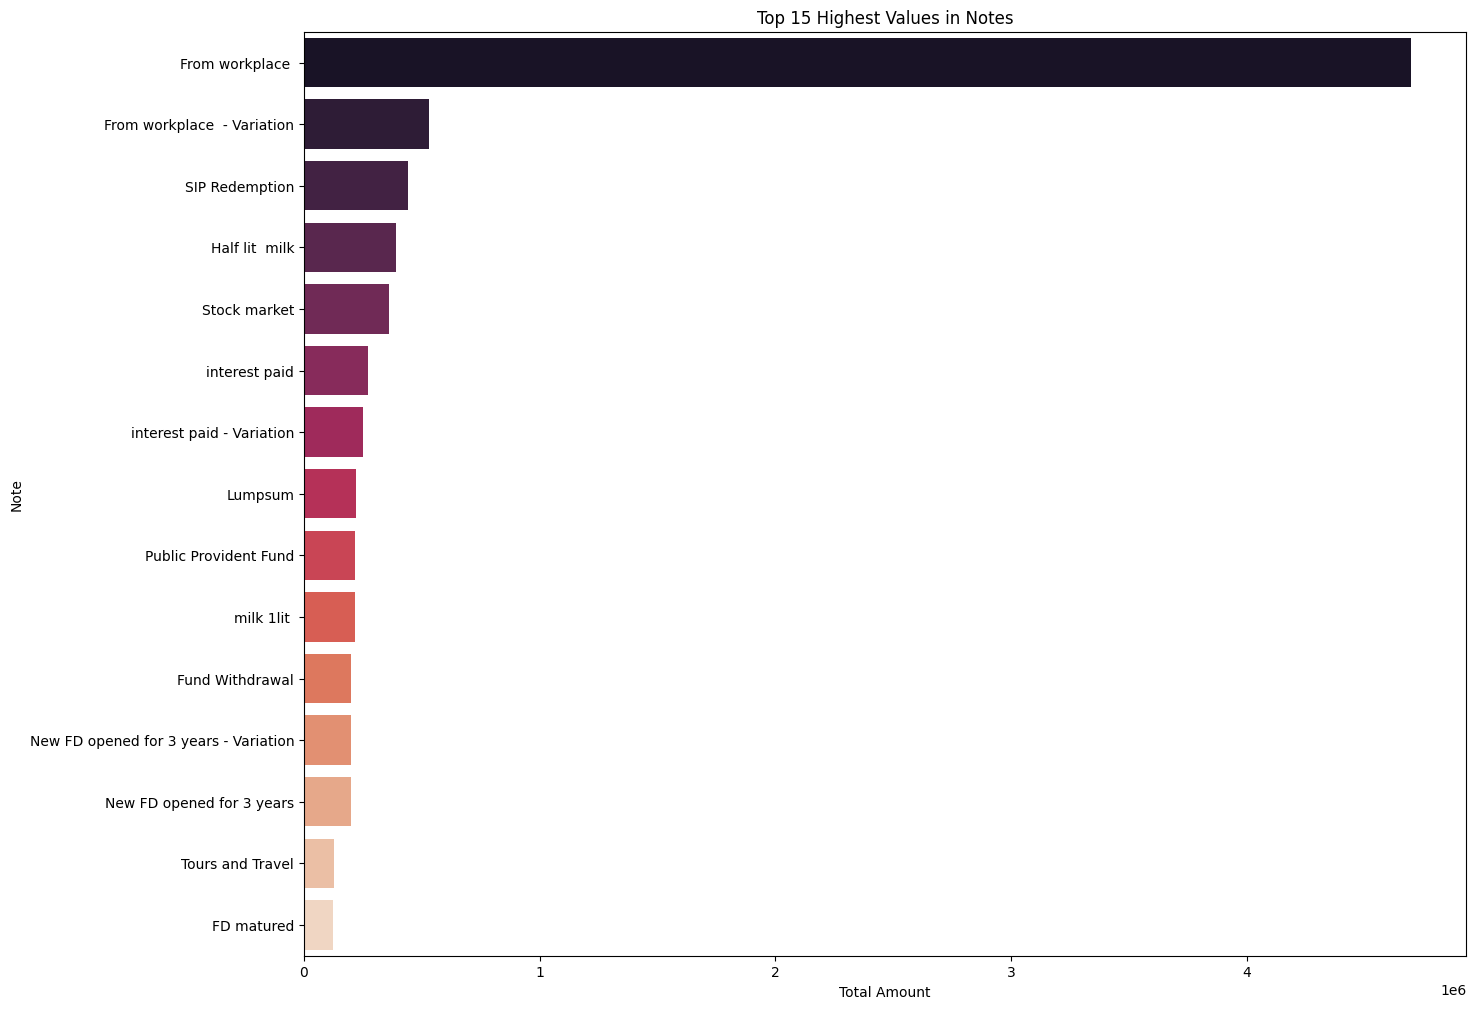

In [84]:
top_15_notes = df.groupby('Note')['Amount'].sum()
desc = top_15_notes.sort_values(ascending = False)
top_15_notes = desc.head(15)


plt.figure(figsize=(15, 12))
sns.barplot(y=top_15_notes.index, x=top_15_notes.values, palette='rocket')
plt.title('Top 15 Highest Values in Notes')
plt.ylabel('Note')
plt.xlabel('Total Amount')

In [77]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 13.7 MB/s eta 0:00:00


In [86]:
df.columns

Index(['Mode', 'Category', 'Subcategory', 'Note', 'Amount', 'Income/Expense',
       'Currency'],
      dtype='object')

In [87]:
# # Reset the index to make 'Date' a column again
# df = df.reset_index()

# # Print the first few rows to check if 'Date' is now a column
# print(df.head())


,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
Date,,,,,,,
2014-12-31,Share Market Trading,Festivals,Cable TV,share auto - hospital to brc station,435.920684,Transfer-Out,INR
2015-01-03,Credit Card,Recurring Deposit,vegetables,bendys chicken biryani,1096.622118,Income,INR
2015-01-01,Fixed Deposit,maid,flour mill,share jeep - Place T top to base,-360.298797,Expense,INR
2015-01-04,Credit Card,Bonus,ropeway,share jeep - Place T to brc,-391.456302,Expense,INR
2015-01-01,Debit Card,Share Market,Taxi,monument,394.506151,Income,INR
...,...,...,...,...,...,...,...
2018-09-19,Cash,Petty cash,Mobile Service Provider,Ganesh idol,-712.402231,Income,INR
2018-09-20,Equity Mutual Fund B,Social Life,Mobile Service Provider,Data booster pack,394.736004,Expense,INR
2018-09-16,Credit Card,Share Market,Trip,1 month subscription,-1428.868477,Transfer-Out,INR


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


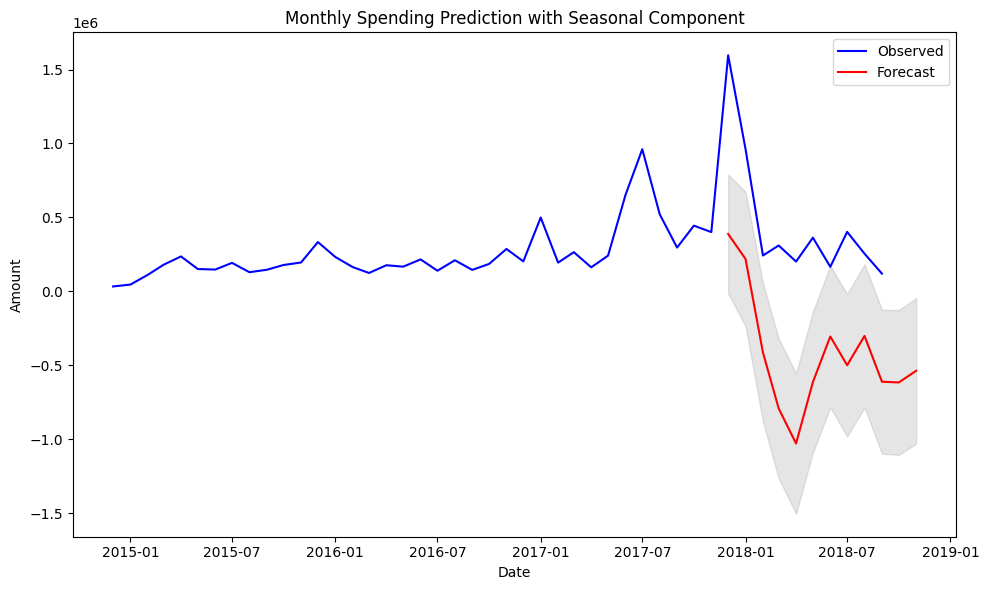

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming the 'df' DataFrame is already loaded and 'Date' is a column

# Preprocess the data: Group by Month and Year, and aggregate the 'Amount'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Ensure 'Date' is in datetime format
df['YearMonth'] = df['Date'].dt.to_period('M')  # Create a 'YearMonth' period column

# Group by 'YearMonth' and sum the 'Amount'
monthly_data = df.groupby('YearMonth')['Amount'].sum()

# Convert to time series format (index as Date)
monthly_data = monthly_data.asfreq('M')

# Convert 'YearMonth' period index to datetime index
monthly_data.index = monthly_data.index.to_timestamp()

# Split the data into training and test sets
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data[:train_size], monthly_data[train_size:]

# Fit SARIMA model (Seasonal ARIMA)
sarima_model = SARIMAX(train,
                       order=(1, 1, 1),       # (AR, I, MA)
                       seasonal_order=(1, 1, 1, 12),  # (Seasonal AR, I, MA, Period)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()

# Forecast the next 12 months
forecast = sarima_result.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Observed', color='blue')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index,
                 forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2)

# Adjust plot labels and title
plt.title('Monthly Spending Prediction with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()

# Adjust y-axis for clarity (optional: scale down if values are large)
plt.yscale('linear')  # You can use 'log' scale if values are too large
plt.tight_layout()
plt.show()


In [108]:
# Check the first few rows of the data
print(df.head())

# Check the columns of the dataframe
print(df.columns)

# Check the data types
print(df.dtypes)

# Check for any missing values
print(df.isna().sum())


        Date                  Mode           Category Subcategory  \
0 2014-12-31  Share Market Trading          Festivals    Cable TV   
1 2015-01-03           Credit Card  Recurring Deposit  vegetables   
2 2015-01-01         Fixed Deposit               maid  flour mill   
3 2015-01-04           Credit Card              Bonus     ropeway   
4 2015-01-01            Debit Card       Share Market        Taxi   

                                   Note       Amount Income/Expense Currency  \
0  share auto - hospital to brc station   435.920684   Transfer-Out      INR   
1                bendys chicken biryani  1096.622118         Income      INR   
2      share jeep - Place T top to base  -360.298797        Expense      INR   
3           share jeep - Place T to brc  -391.456302        Expense      INR   
4                              monument   394.506151         Income      INR   

  YearMonth  
0   2014-12  
1   2015-01  
2   2015-01  
3   2015-01  
4   2015-01  
Index(['Date', 'Mode

In [109]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Ensure 'Amount' is numeric
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Drop rows with missing values in 'Amount' or 'Date'
df = df.dropna(subset=['Amount', 'Date'])

# Create 'YearMonth' column for grouping by month
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group the data by 'YearMonth' and aggregate 'Amount'
monthly_data = df.groupby('YearMonth')['Amount'].sum()

# Convert the 'YearMonth' index to a timestamp to make it a proper time series index
monthly_data = monthly_data.asfreq('M')
monthly_data.index = monthly_data.index.to_timestamp()

# Inspect the aggregated data
print(monthly_data.head())


YearMonth
2014-12-01     32771.441267
2015-01-01     45577.723590
2015-02-01    111617.689994
2015-03-01    179561.992712
2015-04-01    235822.100764
Freq: MS, Name: Amount, dtype: float64


In [111]:
# Split the data into train and test sets (80% training, 20% testing)
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data[:train_size], monthly_data[train_size:]

# Inspect the sizes of the splits
print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")


Train size: 36
Test size: 10


In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (Seasonal ARIMA)
sarima_model = SARIMAX(train,
                       order=(1, 1, 1),       # AR, I, MA orders
                       seasonal_order=(1, 1, 1, 12),  # Seasonal AR, I, MA orders
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit()

# Print model summary to check for any warnings or issues
print(sarima_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                             Amount   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -123.114
Date:                            Wed, 25 Dec 2024   AIC                            256.227
Time:                                    17:53:32   BIC                            257.214
Sample:                                12-01-2014   HQIC                           254.099
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5404      0.606      0.891      0.373      -0.648       1.729
ma.L1         -1.0245      0.549   

Mean Absolute Error: 400897.8799110708


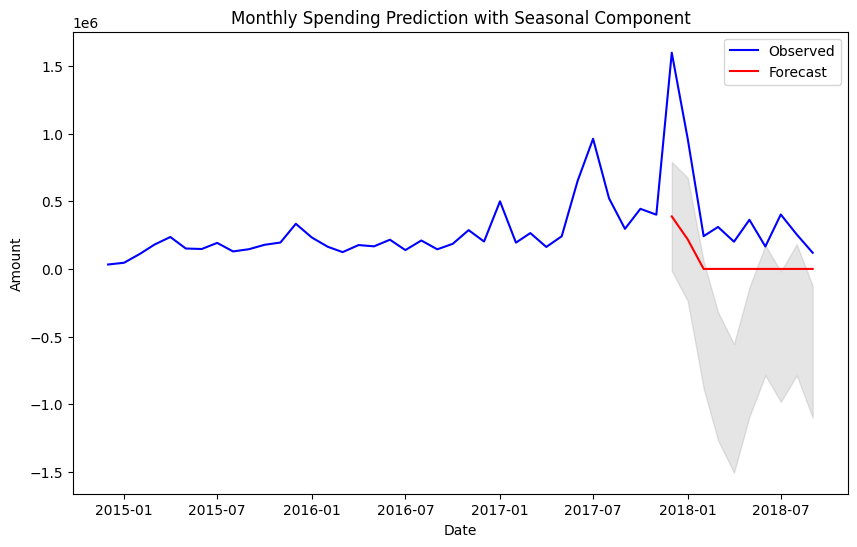

In [116]:
from sklearn.metrics import mean_absolute_error

# Forecast the next 10 months (match the length of the test set)
forecast = sarima_result.get_forecast(steps=len(test))  # Use len(test) to match the forecast length
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Clip negative values to 0 (to avoid negative spending)
forecast_mean = forecast_mean.clip(lower=0)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(test, forecast_mean)
print(f'Mean Absolute Error: {mae}')

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the historical data (train + actual test data)
plt.plot(monthly_data.index, monthly_data, label='Observed', color='blue')

# Plot the forecasted data (only forecasted 10 months)
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')

# Fill the confidence interval
plt.fill_between(forecast_mean.index,
                 forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2)

# Add labels and title
plt.title('Monthly Spending Prediction with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()

# Show the plot
plt.show()


Mean Absolute Error (MAE): 400897.8799110708
Accuracy (within 10% error): 0.00%


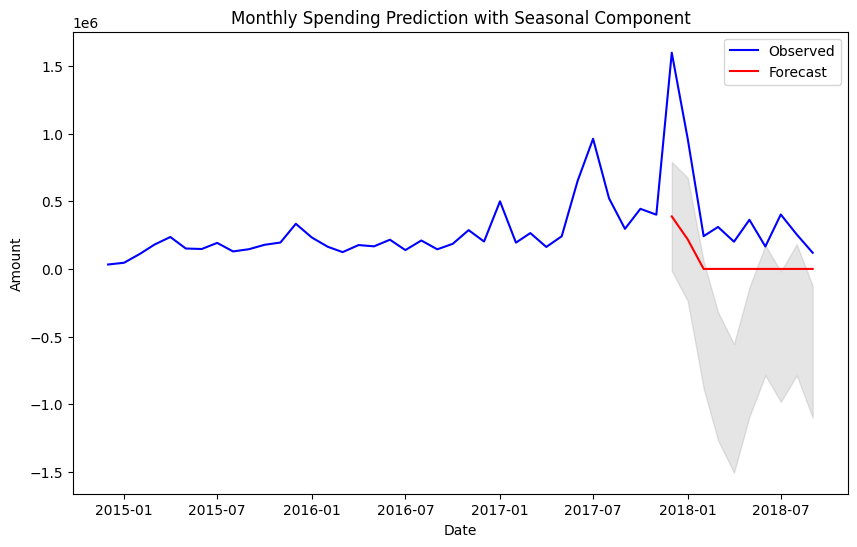

In [117]:
from sklearn.metrics import mean_absolute_error

# Forecast the next 10 months (match the length of the test set)
forecast = sarima_result.get_forecast(steps=len(test))  # Use len(test) to match the forecast length
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Clip negative values to 0 (to avoid negative spending)
forecast_mean = forecast_mean.clip(lower=0)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(test, forecast_mean)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate accuracy (for example, forecast within 10% error)
threshold = 0.10  # 10% error threshold
accuracy = np.mean(np.abs((forecast_mean - test) / test) <= threshold) * 100
print(f'Accuracy (within 10% error): {accuracy:.2f}%')

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the historical data (train + actual test data)
plt.plot(monthly_data.index, monthly_data, label='Observed', color='blue')

# Plot the forecasted data (only forecasted 10 months)
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')

# Fill the confidence interval
plt.fill_between(forecast_mean.index,
                 forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='gray', alpha=0.2)

# Add labels and title
plt.title('Monthly Spending Prediction with Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()

# Show the plot
plt.show()
